### Web Scraping - Customer Reviews of Vison Works from consumeraffiars.com

In [ ]:
# URL
url = "https://www.consumeraffairs.com/eyeglasses/visionworks.html"

# HTTP request
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)


In [ ]:
response

<Response [200]>

In [ ]:
if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')
    reviews = []
    
    for review in soup.find_all('div', class_='rvw__cntr'):
        location = review.find('span', class_='rvw__inf-lctn').text if review.find('span', class_='rvw__inf-lctn') else None
        
        rating = None
        rating_meta = review.find('meta', attrs={'itemprop': 'ratingValue'})
        if rating_meta:
            rating = rating_meta.get('content')
            
        date = review.find('p', class_='rvw__rvd-dt').text.strip() if review.find('p', class_='rvw__rvd-dt') else None
        
        review_text = None
        text_div = review.find('div', class_='rvw__top-text')
        if text_div and text_div.find('p'):
            review_text = text_div.find('p').text
            
        reviews.append({
            'location': location,
            'rating': rating,
            'date': date,
            'text': review_text
        })

In [ ]:
reviews

[{'location': 'Bala Cynwyd, PA',
  'rating': '4',
  'date': 'Reviewed Dec. 31, 2024',
  'text': 'I had glasses made at Visionworks Promenade in Miami. Mr. Paul ** know his profession, was attentive, excellent, he was helpful not just to me but to others as well. The downside is that when I walked in I had to wait about one hour for him to be available. I did not want to deal with other staff because I had bad experience with them (not attentive, just wanting to get rid of you asap). I recommend him highly at this Visionworks. One other great thing there is that if you do not like your glasses for some reason, within a 100 days you can request it to be changed free of charge.'},
 {'location': 'Orlando, FL',
  'rating': '5',
  'date': 'Reviewed Dec. 2, 2024',
  'text': 'The entire staff was as helpful as necessary.. Sandy ** went over and above of what I had expected from someone who was going to aid me in doing the right decision for my eyes. Not only super informative, she was also com

### Saving to csv file

In [ ]:
def extract_reviews(base_url):
    all_reviews = []
    page = 1
    
    while True:
        url = f"{base_url}?page={page}" 
        
        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36'
        }
        
        response = requests.get(url, headers=headers)
        
        if response.status_code == 200:
            soup = BeautifulSoup(response.text, 'html.parser')
            reviews_on_page = soup.find_all('div', class_='rvw__cntr')
            
            # If the page does not have any reviews, exit
            if not reviews_on_page:
                break
                
            for review in reviews_on_page:
                location = review.find('span', class_='rvw__inf-lctn').text if review.find('span', class_='rvw__inf-lctn') else None
                
                rating = None
                rating_meta = review.find('meta', attrs={'itemprop': 'ratingValue'})
                if rating_meta:
                    rating = rating_meta.get('content')
                    
                date = review.find('p', class_='rvw__rvd-dt').text.strip() if review.find('p', class_='rvw__rvd-dt') else None
                
                review_text = None
                text_div = review.find('div', class_='rvw__top-text')
                if text_div and text_div.find('p'):
                    review_text = text_div.find('p').text
                    
                all_reviews.append({
                    'location': location,
                    'rating': rating,
                    'date': date,
                    'text': review_text
                })
            
            print(f"Page {page} Done")
            page += 1
            
            # Limit the pages - there were up to 5 pages
            if page > 5:  # up to 5 pages
                break
                
            # Optional: delay between requests
            time.sleep(2)  # wait for 2 xec
            
        else:
            print(f'Page {page} Failed. Code: {response.status_code}')
            break
    
    return all_reviews


In [ ]:
reviews = extract_reviews(url)
if reviews:
    for review in reviews:
        print("Location:", review['location'])
        print("Rating:", review['rating'])
        print("Date:", review['date'])
        print("Text:", review['text'])
        print("-" * 50)


Page 1 Done
Page 2 Done
Page 3 Done
Page 4 Done
Page 5 Done
Location: Bala Cynwyd, PA
Rating: 4
Date: Reviewed Dec. 31, 2024
Text: I had glasses made at Visionworks Promenade in Miami. Mr. Paul ** know his profession, was attentive, excellent, he was helpful not just to me but to others as well. The downside is that when I walked in I had to wait about one hour for him to be available. I did not want to deal with other staff because I had bad experience with them (not attentive, just wanting to get rid of you asap). I recommend him highly at this Visionworks. One other great thing there is that if you do not like your glasses for some reason, within a 100 days you can request it to be changed free of charge.
--------------------------------------------------
Location: Orlando, FL
Rating: 5
Date: Reviewed Dec. 2, 2024
Text: The entire staff was as helpful as necessary.. Sandy ** went over and above of what I had expected from someone who was going to aid me in doing the right decision f

In [ ]:
import pandas as pd

# DataFrame
df = pd.DataFrame(reviews)

# Setting Columns
df.columns = ['Location', 'Rating', 'Date', 'Review']

# Save into CSV file
df.to_csv('reviews.csv', index=False)

## Customer Review Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
# nltk.download('punkt_tab')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import bigrams, trigrams
from nltk.probability import FreqDist
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [2]:
df = pd.read_csv("reviews.csv")
df.head()

,Location,Rating,Date,Review
0,"Bala Cynwyd, PA",4.0,"Reviewed Dec. 31, 2024",I had glasses made at Visionworks Promenade in...
1,"Orlando, FL",5.0,"Reviewed Dec. 2, 2024",The entire staff was as helpful as necessary.....
2,"Jacksonville, FL",5.0,"Reviewed Nov. 16, 2024",I had my regular eye exam at VisionWorks at To...
3,"Des Moines, IA",5.0,"Reviewed Nov. 12, 2024",Had an emergency eye accident. My doctor told ...
4,"White Plains, MD",5.0,"Reviewed April 6, 2024",I went in to exchange my newly purchased glass...


In [3]:
# Data Cleansing

# Separating Location to City and State
df[['City', 'State']] = df['Location'].str.split(', ', expand=True)

# cleansing and converting the format of 'Date'
# Removing 'Reviewed ' or 'Updated review: '
df['Date'] = df['Date'].str.replace('Reviewed ', '')
df['Date'] = df['Date'].str.replace('Updated review: ', '')

df.head()

,Location,Rating,Date,Review,City,State
0,"Bala Cynwyd, PA",4.0,"Dec. 31, 2024",I had glasses made at Visionworks Promenade in...,Bala Cynwyd,PA
1,"Orlando, FL",5.0,"Dec. 2, 2024",The entire staff was as helpful as necessary.....,Orlando,FL
2,"Jacksonville, FL",5.0,"Nov. 16, 2024",I had my regular eye exam at VisionWorks at To...,Jacksonville,FL
3,"Des Moines, IA",5.0,"Nov. 12, 2024",Had an emergency eye accident. My doctor told ...,Des Moines,IA
4,"White Plains, MD",5.0,"April 6, 2024",I went in to exchange my newly purchased glass...,White Plains,MD


In [4]:
# 3. State into upper cases
df['State'] = df['State'].str.upper()

In [5]:
month_map = {
    "January": "Jan.", "February": "Feb.", "March": "Mar.", "April": "Apr.", "May": "May.",
    "June": "Jun.", "July": "Jul.", "August": "Aug.", "September": "Sep.", "October": "Oct.",
    "November": "Nov.", "December": "Dec.", "Sept.":"Sep."
}

for full, short in month_map.items():
    df["Date"] = df["Date"].str.replace(full, short, regex=True)

# Date 컬럼을 datetime 형식으로 변환
df["Date"] = pd.to_datetime(df["Date"], format="%b. %d, %Y", errors='coerce')


In [6]:
df.head()

,Location,Rating,Date,Review,City,State
0,"Bala Cynwyd, PA",4.0,2024-12-31,I had glasses made at Visionworks Promenade in...,Bala Cynwyd,PA
1,"Orlando, FL",5.0,2024-12-02,The entire staff was as helpful as necessary.....,Orlando,FL
2,"Jacksonville, FL",5.0,2024-11-16,I had my regular eye exam at VisionWorks at To...,Jacksonville,FL
3,"Des Moines, IA",5.0,2024-11-12,Had an emergency eye accident. My doctor told ...,Des Moines,IA
4,"White Plains, MD",5.0,2024-04-06,I went in to exchange my newly purchased glass...,White Plains,MD


In [7]:
print(df["Date"].isna().sum())  # NaT count

0


In [8]:
print(df[df["Date"].isna()])

Empty DataFrame
Columns: [Location, Rating, Date, Review, City, State]
Index: []


In [9]:
# 5. Reorder of the columns
df = df[['City', 'State', 'Rating', 'Date', 'Review']]
df.head()


,City,State,Rating,Date,Review
0,Bala Cynwyd,PA,4.0,2024-12-31,I had glasses made at Visionworks Promenade in...
1,Orlando,FL,5.0,2024-12-02,The entire staff was as helpful as necessary.....
2,Jacksonville,FL,5.0,2024-11-16,I had my regular eye exam at VisionWorks at To...
3,Des Moines,IA,5.0,2024-11-12,Had an emergency eye accident. My doctor told ...
4,White Plains,MD,5.0,2024-04-06,I went in to exchange my newly purchased glass...


In [10]:
# Check missing ratings count
na_rating = df["Rating"].isna().sum()
print(na_rating)

# Calculate percentage of missing ratings
missing_percentage = np.round((na_rating/len(df)) * 100, 2)
print(f"Missing rating accounts for {missing_percentage}% of the total dataset.")

3
Missing rating accounts for 0.5% of the total dataset.


There are 3 out of 604 that has empty ratings. This accounts for 0.5% of the total data. Thus I will remove these 3 rows.

In [11]:
df = df.dropna(subset=["Rating"])

print(len(df))

601


## Visualization

### Review trend in time

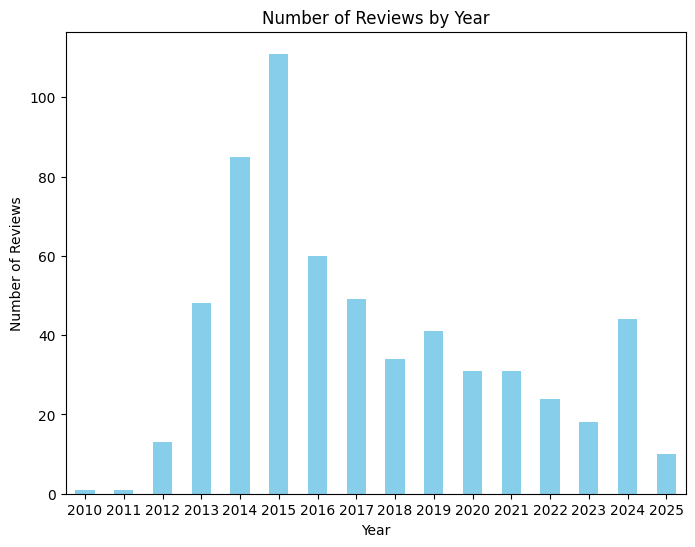

In [12]:
# Review counts per year
df['Year'] = df['Date'].dt.year
yearly_review_count = df.groupby('Year').size()

# Visualization
plt.figure(figsize=(8, 6))
yearly_review_count.plot(kind='bar', color='skyblue')
plt.title('Number of Reviews by Year')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.show()

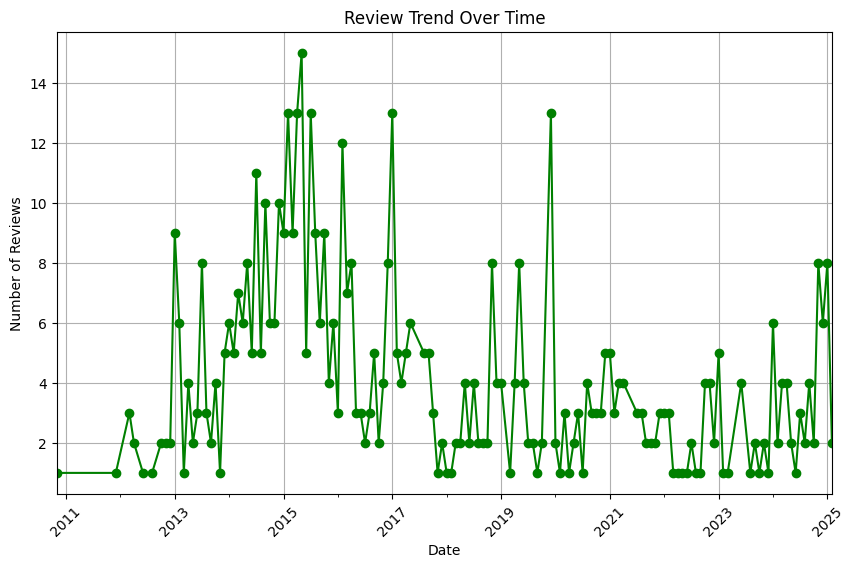

In [13]:
# Rview count - break down into months as well
df['Month'] = df['Date'].dt.to_period('M')
monthly_review_count = df.groupby('Month').size()

# Visualization
plt.figure(figsize=(10, 6))
monthly_review_count.plot(kind='line', marker='o', color='green')
plt.title('Review Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

### Review by States

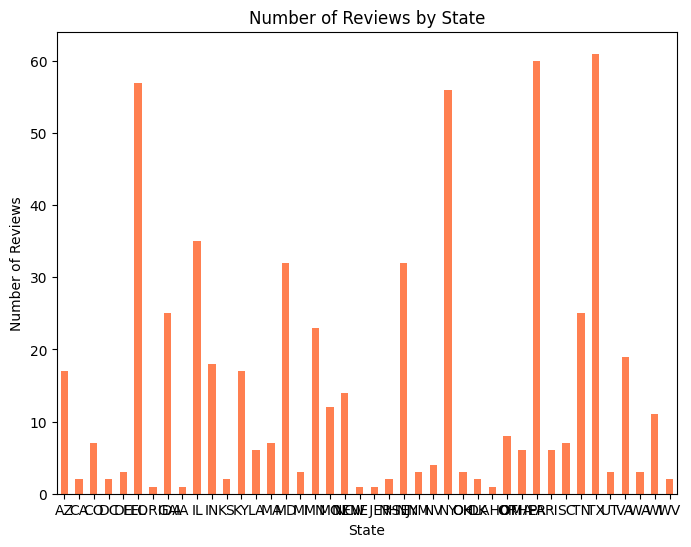

In [14]:
# review counts by State
state_review_count = df.groupby('State').size()

# Visualization
plt.figure(figsize=(8, 6))
state_review_count.plot(kind='bar', color='coral')
plt.title('Number of Reviews by State')
plt.xlabel('State')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.show()


In [15]:
# Counting reviews by State
state_review_count = df.groupby('State').size()

# By descending order
state_review_count_sorted = state_review_count.sort_values(ascending=False)

print(state_review_count_sorted)

State
TX            61
PA            60
FL            57
NY            56
IL            35
MD            32
NJ            32
TN            25
GA            25
MN            23
VA            19
IN            18
AZ            17
KY            17
NC            14
MO            12
WI            11
OR             8
MA             7
CO             7
SC             7
RI             6
OTHER          6
LA             6
NV             4
WA             3
UT             3
DE             3
NM             3
MI             3
OH             3
WV             2
OK             2
NH             2
CA             2
KS             2
DC             2
OKLAHOMA       1
NE             1
IA             1
FLORIDA        1
NEW JERSEY     1
dtype: int64


### Review Rating

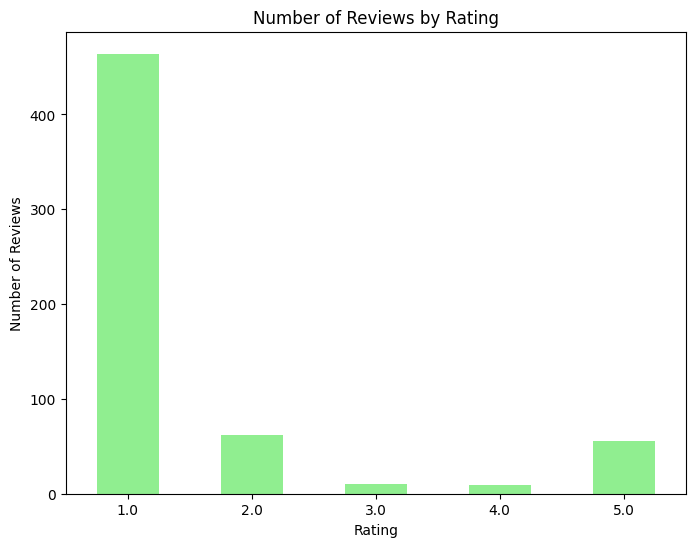

In [16]:
# review counts by ratings
rating_review_count = df.groupby('Rating').size()

# Visualization
plt.figure(figsize=(8, 6))
rating_review_count.plot(kind='bar', color='lightgreen')
plt.title('Number of Reviews by Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.show()

Rating Distribution (%):
1.0: 77.20%
2.0: 10.32%
5.0: 9.32%
3.0: 1.66%
4.0: 1.50%


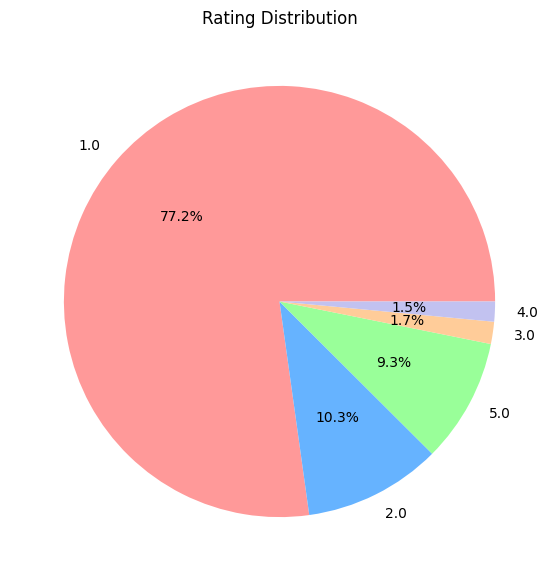

In [17]:
# Rating Distribution
rating_counts = df["Rating"].value_counts()
total_count = rating_counts.sum()

# Calculating the percentage
rating_percentages = (rating_counts / total_count) * 100

# Print the percentages
print("Rating Distribution (%):")
for rating, percent in rating_percentages.items():
    print(f"{rating}: {percent:.2f}%")

# Visualization - pie chart
plt.figure(figsize=(7, 7))
plt.pie(rating_counts, labels=rating_counts.index, autopct="%1.1f%%", colors=["#ff9999","#66b3ff","#99ff99","#ffcc99","#c2c2f0","#ffb3e6"])
plt.title("Rating Distribution")
plt.show()

## Sentiment Analysis

In [18]:
df['Review'] = df['Review'].str.lower()
for i in df['Review'].sample(5):
    print("Review: ", i, '\n')

Review:  i had my eye exam last night 2-13-15, was told i was getting hd lenses and that the buy one get one was a better deal then my insurance. i ordered the glasses then today i read the reviews realized i had been taken so i canceled the order today. i will need to go in monday to turn in my "free" cleaning kit that i was charged for! buyer beware, in this case you aren't pay for what you get except a cheaper version that isn't what it is supposed to be. 

Review:  i had a appointment at 2:45 today. i arrived early. when i approached the desk the lady told me to give her my insurance info and be quick about it!! when i asked her to look it up she wouldn't even bother, was extremely rude and unprofessional. the dr sat right next to her during this and they acted like it was a big joke. how is this business still open?? 

Review:  i waited 2 weeks for glasses that had a prescription. i could have gotten over the counter. i could not see up close or at a distance. i was asked to take 

In [19]:
# Remove punctuation from the text
def clean_text(text):
    punc_pattern = r'[^\w\s]' # Not a word (\w) or space (\s)
    text = re.sub(punc_pattern, '', text)
    
    return text.strip()

# Apply the function to the 'Review' column
df['Review'] = df['Review'].apply(clean_text)


In [20]:
df

,City,State,Rating,Date,Review,Year,Month
0,Bala Cynwyd,PA,4.0,2024-12-31,i had glasses made at visionworks promenade in...,2024,2024-12
1,Orlando,FL,5.0,2024-12-02,the entire staff was as helpful as necessary s...,2024,2024-12
2,Jacksonville,FL,5.0,2024-11-16,i had my regular eye exam at visionworks at to...,2024,2024-11
3,Des Moines,IA,5.0,2024-11-12,had an emergency eye accident my doctor told m...,2024,2024-11
4,White Plains,MD,5.0,2024-04-06,i went in to exchange my newly purchased glass...,2024,2024-04
...,...,...,...,...,...,...,...
596,Shorewood,WI,2.0,2012-03-30,i have attempted to go to this store twice now...,2012,2012-03
597,Milwaukee,WI,2.0,2012-03-28,poor customer service i am going to as many we...,2012,2012-03
598,Jasper,GA,1.0,2012-03-12,my sons glasses are 67 months old and have bro...,2012,2012-03
599,Gary,IN,1.0,2011-12-04,on september 30th i visited the visionworks st...,2011,2011-12


In [21]:
from collections import Counter

# Concatenate all the narratives into a single string
all_narratives = ' '.join(df['Review'])

# Tokenize the text and count word frequencies
word_counts = Counter(all_narratives.split())
# split() method is used to tokenize the text
# it breaks the text into individual words
# Then, Counter is used to count the frequency of each unique word in the tokenized text

In [22]:
# Convert the word counts into a list of tuples for sorting
sorted_word_counts = sorted(word_counts.items(), key=lambda x:x[1], reverse=True)

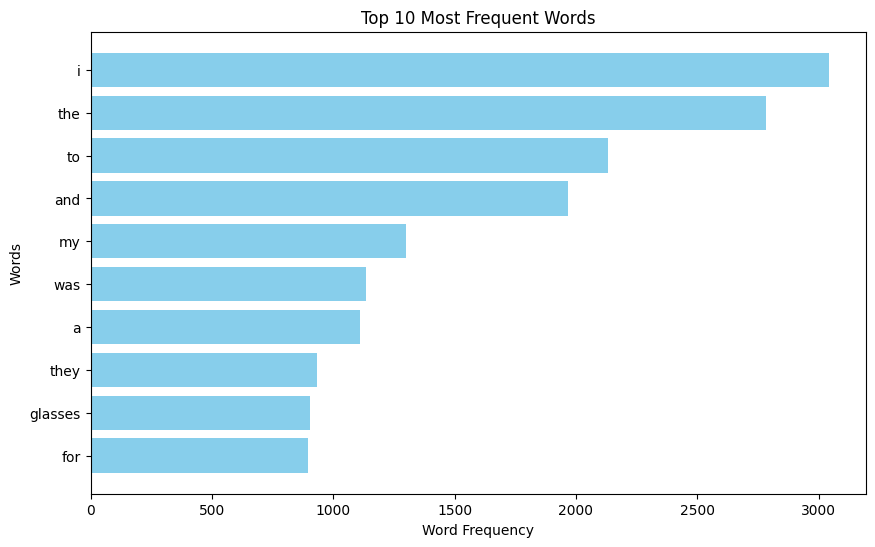

In [23]:
top_words = [word for word, count in sorted_word_counts[:10]]
top_counts = [count for word, count in sorted_word_counts[:10]]

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_words, top_counts, color='skyblue')
plt.xlabel('Word Frequency')
plt.ylabel('Words')
plt.title('Top 10 Most Frequent Words')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest frequency on top
plt.show()

In [24]:
word_counts

Counter({'i': 3041,
         'the': 2783,
         'to': 2132,
         'and': 1968,
         'my': 1300,
         'was': 1133,
         'a': 1110,
         'they': 932,
         'glasses': 906,
         'for': 897,
         'of': 844,
         'in': 800,
         'that': 727,
         'me': 654,
         'them': 542,
         'not': 541,
         'have': 537,
         'on': 499,
         'had': 488,
         'with': 457,
         'it': 453,
         'visionworks': 398,
         'she': 364,
         'told': 364,
         'at': 360,
         'is': 358,
         'this': 346,
         'pair': 340,
         'went': 332,
         'so': 322,
         'were': 320,
         'would': 317,
         'get': 312,
         'be': 302,
         'one': 300,
         'when': 276,
         'lenses': 275,
         'out': 273,
         'but': 270,
         'back': 263,
         'you': 258,
         'store': 256,
         'an': 248,
         'up': 240,
         'eye': 234,
         'we': 233,
         'fram

In [25]:
# Handling stopwords
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sjhang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [26]:
stop_words = set(stopwords.words('english'))

# Tokenize and preprocess the text data
all_narratives = ' '.join(df['Review'])
words = word_tokenize(all_narratives)
words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]

In [27]:
# Generate bigrams and trigrams
bigram_list = list(bigrams(words))
trigram_list = list(trigrams(words))

# Calculate frequencies of bigrams and trigrams
bigram_freq = FreqDist(bigram_list)
trigram_freq = FreqDist(trigram_list)

# Print most common bigrams and trigrams
print("Top 10 most common bigrams:")
print(bigram_freq.most_common(10))

print("\nTop 10 most common trigrams:")
print(trigram_freq.most_common(10))

Top 10 most common bigrams:
[(('eye', 'exam'), 92), (('customer', 'service'), 88), (('pair', 'glasses'), 88), (('went', 'visionworks'), 82), (('new', 'glasses'), 51), (('one', 'pair'), 46), (('went', 'back'), 45), (('go', 'back'), 44), (('vision', 'works'), 42), (('told', 'would'), 42)]

Top 10 most common trigrams:
[(('buy', 'one', 'get'), 26), (('one', 'get', 'one'), 26), (('get', 'one', 'free'), 19), (('never', 'go', 'back'), 18), (('new', 'pair', 'glasses'), 12), (('two', 'pairs', 'glasses'), 11), (('went', 'pick', 'glasses'), 9), (('went', 'visionworks', 'get'), 9), (('great', 'customer', 'service'), 8), (('worst', 'customer', 'service'), 8)]


In [28]:
# you can define your own frequent_words
frequent_words = ["theyre", "also", "using", "I", "it", "U", "You", "He", "We", "They", "It", "She", "is", "was", "s"]
def remove_frequent_words(text):
    # Split the tweet into words
    words = text.split()
    # Remove frequent words
    words = [word for word in words if word.lower() not in frequent_words and word.lower() not in stop_words]
    # Join the remaining words back into a string
    preprocessed_text = ' '.join(words)
    return preprocessed_text

# Apply the preprocess_text_column function to the text column and store the result in a new column
df['Review'] = df['Review'].apply(remove_frequent_words)

In [29]:
# Extract 5 random samples
sample_data = df.sample(n=5)

sample_text = []
for i, row in sample_data.iterrows():
    text = f"Complaint {i+1}: {row['Review']}"
    sample_text.append(text)
print('\n\n'.join(sample_text))

Complaint 61: gave wrong glasses returned telling wrong woman saw said glasses right said cant see told advanced cataracts thats reason knew lying seen optometrist year ago said exactly opposite really great dr honest woman top rude phillip think refunded money yet insurance promise bad place go couldnt get app optometrist went bad decision finally got hold optometrist naturally said cataract need glasses cataracts wait still surgery gave new readers happy dr best important glasses done eyes checked excellent professional everyone gold canyon eyes wonderful

Complaint 137: 1st set glasses unusable 2nd pair unusable 3rd pair unusable 4th pair one three prescriptions trifocals lens got money back apology concern regret couldnt job

Complaint 6: yet get glasses 3 weeks one called call times called 800 number cut twice transferred store without letting say anything good customer service probably wont use

Complaint 194: visionworks doesnt take time ensure look great new eyeglasses ensure s

In [30]:
def preprocess_text(text):
    # Remove punctuation
    text = re.sub(r'^\w\s', '', text)

    # Tokenize the text
    words = word_tokenize(text)

    # Perform stemming (using Porter Stemmer)
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(word) for word in words]

    # Perform lemmatization (using WordNet Lemmatizer)
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

    # Join the processed words back into a sentence
    stemmed_text = ' '.join(stemmed_words)
    lemmatized_text = ' '.join(lemmatized_words)

    return stemmed_words, lemmatized_words

# Apply the preprocessing function to the 'Consumer complaint narrative' column
df['Stemmed Text'], df['Lemmatized Text'] = zip(*df['Review'].apply(preprocess_text))

In [31]:
df.head()

,City,State,Rating,Date,Review,Year,Month,Stemmed Text,Lemmatized Text
0,Bala Cynwyd,PA,4.0,2024-12-31,glasses made visionworks promenade miami mr pa...,2024,2024-12,"[glass, made, visionwork, promenad, miami, mr,...","[glass, made, visionworks, promenade, miami, m..."
1,Orlando,FL,5.0,2024-12-02,entire staff helpful necessary sandy went expe...,2024,2024-12,"[entir, staff, help, necessari, sandi, went, e...","[entire, staff, helpful, necessary, sandy, wen..."
2,Jacksonville,FL,5.0,2024-11-16,regular eye exam visionworks town center last ...,2024,2024-11,"[regular, eye, exam, visionwork, town, center,...","[regular, eye, exam, visionworks, town, center..."
3,Des Moines,IA,5.0,2024-11-12,emergency eye accident doctor told wear contac...,2024,2024-11,"[emerg, eye, accid, doctor, told, wear, contac...","[emergency, eye, accident, doctor, told, wear,..."
4,White Plains,MD,5.0,2024-04-06,went exchange newly purchased glasses last eve...,2024,2024-04,"[went, exchang, newli, purchas, glass, last, e...","[went, exchange, newly, purchased, glass, last..."


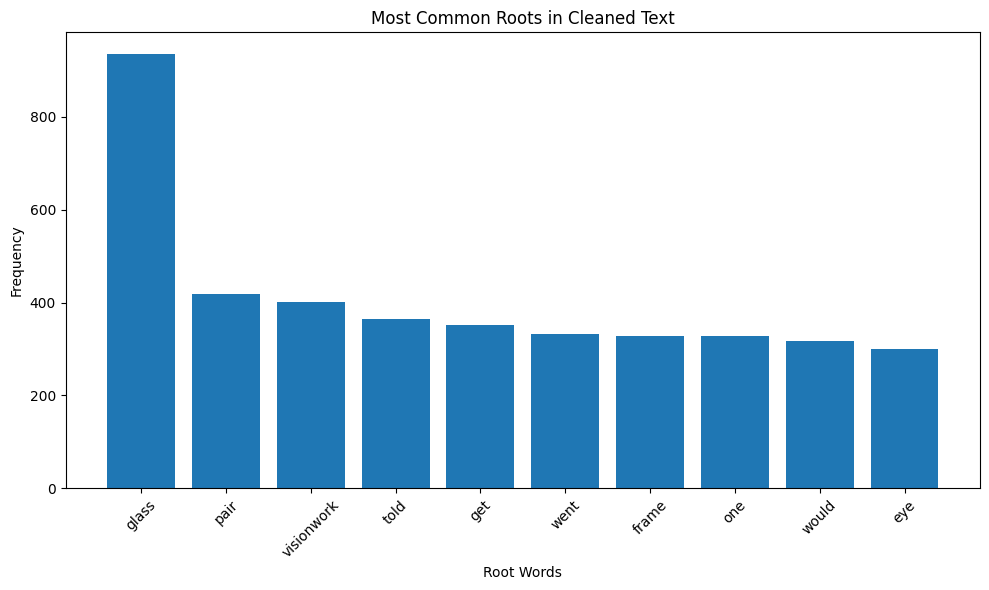

In [32]:
import matplotlib.pyplot as plt
from collections import Counter

cleaned_words_stemmed = [stem for stems_list in df['Stemmed Text'] for stem in stems_list]

# Use Counter to count the frequency of each root
word_freq = Counter(cleaned_words_stemmed)

# Get the most common roots
most_common_roots = word_freq.most_common(10)  

# Extract the roots and their frequencies for plotting
roots, frequencies = zip(*most_common_roots)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(roots, frequencies)
plt.xlabel('Root Words')
plt.ylabel('Frequency')
plt.title('Most Common Roots in Cleaned Text')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

## Sentiment Analysis using Vader

In [33]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

def get_sentiment_score(stem_list):
    stemmed_text = ' '.join(stem_list)
    return analyzer.polarity_scores(stemmed_text)['compound']

# Apply sentiment analysis to the 'Stemmed Text' column
df['Sentiment Score'] = df['Stemmed Text'].apply(get_sentiment_score)

In [34]:
# Apply sentiment analysis to the 'Stemmed Text' column in scale of 1-5
def assign_sentiment(score):
    if score < -0.5:
        return 1
    elif -0.5 <= score < -0.1:
        return 2
    elif -0.1 <= score < 0.1:
        return 3
    elif 0.1 <= score < 0.5:
        return 4
    else:
        return 5
    
df['Sentiment Score (1-5)'] = df['Sentiment Score'].apply(assign_sentiment) 

In [35]:
df.head()

,City,State,Rating,Date,Review,Year,Month,Stemmed Text,Lemmatized Text,Sentiment Score,Sentiment Score (1-5)
0,Bala Cynwyd,PA,4.0,2024-12-31,glasses made visionworks promenade miami mr pa...,2024,2024-12,"[glass, made, visionwork, promenad, miami, mr,...","[glass, made, visionworks, promenade, miami, m...",0.9460,5
1,Orlando,FL,5.0,2024-12-02,entire staff helpful necessary sandy went expe...,2024,2024-12,"[entir, staff, help, necessari, sandi, went, e...","[entire, staff, helpful, necessary, sandy, wen...",0.8807,5
2,Jacksonville,FL,5.0,2024-11-16,regular eye exam visionworks town center last ...,2024,2024-11,"[regular, eye, exam, visionwork, town, center,...","[regular, eye, exam, visionworks, town, center...",0.9814,5
3,Des Moines,IA,5.0,2024-11-12,emergency eye accident doctor told wear contac...,2024,2024-11,"[emerg, eye, accid, doctor, told, wear, contac...","[emergency, eye, accident, doctor, told, wear,...",0.6348,5
4,White Plains,MD,5.0,2024-04-06,went exchange newly purchased glasses last eve...,2024,2024-04,"[went, exchang, newli, purchas, glass, last, e...","[went, exchange, newly, purchased, glass, last...",0.9313,5


In [36]:
# Group by sentiment rating
grouped = df.groupby('Sentiment Score (1-5)')

# Function to safely select up to 2 samples per sentiment category
def get_two_samples(group):
    return group.sample(n=2, random_state=42)  # Set random_state for reproducibility

# Apply the function to each group and concatenate results
samples = grouped.apply(get_two_samples).reset_index(drop=True)

for index, row in samples.iterrows():
    print(f"\nSentiment Score (1-5): {row['Sentiment Score (1-5)']}")
    print(f"Consumer complaint narrative:\n{row['Review']}\n" + "-"*100)



Sentiment Score (1-5): 1
Consumer complaint narrative:
well year ago purchased glasses visionworks rivergate mall store nashville tn staff advised upgrade polycarbonate lenses final bill around 150 tried several months wear glasses color band like seeing light beams prism tried vain get corrected finally gave put 150 loss bad experience several months passed decided 5 weeks ago show prismcolorspectrum effect associate visionworks store indian lake hendersonvilletn minutes saw abnormal effect consultation manager decided replace lens simpler lenses cost 56 visits store past 5 weeks sight glassesnew lenses story every time yet 56 weeks feeble excuse last time dropped 45 days ago politely asked unusable glasses back told associate cancel glasseslenses could go walmart get less week ok reply
----------------------------------------------------------------------------------------------------

Sentiment Score (1-5): 1
Consumer complaint narrative:
visiting location camp hill pa years take e

/var/folders/j1/17055ftj3cn3s65tq24363mc0000gn/T/ipykernel_21813/324693228.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  samples = grouped.apply(get_two_samples).reset_index(drop=True)


In [37]:
sentiment_score_count = df.groupby('Sentiment Score (1-5)').size()

# Sort by descending order
sentiment_score_count_sorted = sentiment_score_count.sort_values(ascending=False)

print(sentiment_score_count_sorted)

Sentiment Score (1-5)
5    249
1    110
2     95
4     94
3     53
dtype: int64


In [38]:
# Count by Sentiment Score
sentiment_count = df['Sentiment Score (1-5)'].value_counts()

# Count by Ratings
rating_count = df['Rating'].value_counts()

# Sentiment Score Proportion
sentiment_percentage = sentiment_count / sentiment_count.sum() * 100

# Print the result
print("Sentiment Score Proportion:")
print(sentiment_percentage)

Sentiment Score Proportion:
Sentiment Score (1-5)
5    41.430948
1    18.302829
2    15.806988
4    15.640599
3     8.818636
Name: count, dtype: float64


In [39]:
# Comparison between Sentiment Score and Rating
rating_df = pd.DataFrame(rating_count).reset_index()
rating_df.columns = ['Rating', 'Count']
rating_df['Sentiment Percentage'] = sentiment_percentage.get(rating_df['Rating'], 0)

print("\nComparison between Rating and Sentiment Score:")
print(rating_df)


Comparison between Rating and Sentiment Score:
   Rating  Count  Sentiment Percentage
0     1.0    464                   NaN
1     2.0     62             18.302829
2     5.0     56             15.806988
3     3.0     10              8.818636
4     4.0      9             15.640599


In [40]:
grouped.head()

,City,State,Rating,Date,Review,Year,Month,Stemmed Text,Lemmatized Text,Sentiment Score,Sentiment Score (1-5)
0,Bala Cynwyd,PA,4.0,2024-12-31,glasses made visionworks promenade miami mr pa...,2024,2024-12,"[glass, made, visionwork, promenad, miami, mr,...","[glass, made, visionworks, promenade, miami, m...",0.9460,5
1,Orlando,FL,5.0,2024-12-02,entire staff helpful necessary sandy went expe...,2024,2024-12,"[entir, staff, help, necessari, sandi, went, e...","[entire, staff, helpful, necessary, sandy, wen...",0.8807,5
2,Jacksonville,FL,5.0,2024-11-16,regular eye exam visionworks town center last ...,2024,2024-11,"[regular, eye, exam, visionwork, town, center,...","[regular, eye, exam, visionworks, town, center...",0.9814,5
3,Des Moines,IA,5.0,2024-11-12,emergency eye accident doctor told wear contac...,2024,2024-11,"[emerg, eye, accid, doctor, told, wear, contac...","[emergency, eye, accident, doctor, told, wear,...",0.6348,5
4,White Plains,MD,5.0,2024-04-06,went exchange newly purchased glasses last eve...,2024,2024-04,"[went, exchang, newli, purchas, glass, last, e...","[went, exchange, newly, purchased, glass, last...",0.9313,5
5,Duluth,GA,1.0,2025-02-13,yet get glasses 3 weeks one called call times ...,2025,2025-02,"[yet, get, glass, 3, week, one, call, call, ti...","[yet, get, glass, 3, week, one, called, call, ...",0.2732,4
6,Las Vegas,NV,1.0,2025-02-05,far ripped ever felt life paid 1600 dollars 2 ...,2025,2025-02,"[far, rip, ever, felt, life, paid, 1600, dolla...","[far, ripped, ever, felt, life, paid, 1600, do...",-0.6818,1
8,Frankfort,NY,1.0,2025-01-30,first appt 102024 contacts never submitted ord...,2025,2025-01,"[first, appt, 102024, contact, never, submit, ...","[first, appt, 102024, contact, never, submitte...",0.0000,3
9,Mount Prospect,IL,1.0,2025-01-30,visionworks niles golf mill called tell sons f...,2025,2025-01,"[visionwork, nile, golf, mill, call, tell, son...","[visionworks, nile, golf, mill, called, tell, ...",-0.9432,1
13,Chicago,IL,1.0,2025-01-07,took ophthalmologists rx visionworks ordered b...,2025,2025-01,"[took, ophthalmologist, rx, visionwork, order,...","[took, ophthalmologist, rx, visionworks, order...",-0.2732,2


In [41]:
rating_sentiment_comparison = df.groupby('Rating')['Sentiment Score'].mean()
print("Average Sentiment Score by Rating:")
print(rating_sentiment_comparison)


Average Sentiment Score by Rating:
Rating
1.0    0.096771
2.0    0.196118
3.0    0.570200
4.0    0.798122
5.0    0.766173
Name: Sentiment Score, dtype: float64


In [42]:
# Correlation
correlation = df['Rating'].corr(df['Sentiment Score (1-5)'])
print(f"Rating과 Sentiment Score 간의 상관 계수: {correlation}")


Rating과 Sentiment Score 간의 상관 계수: 0.3037412296763115


In [43]:
from scipy import stats

# 2. Paired T-test
t_statistic, p_value = stats.ttest_rel(df['Rating'], df['Sentiment Score (1-5)'])

print(f"Paired T-test 결과: T-statistic = {t_statistic}, p-value = {p_value}")

if p_value < 0.05:
    print("Rating과 Sentiment Score 간에 유의미한 차이가 있습니다.")
else:
    print("Rating과 Sentiment Score 간에 유의미한 차이가 없습니다.")


Paired T-test 결과: T-statistic = -27.863534582391623, p-value = 2.888384166890814e-110
Rating과 Sentiment Score 간에 유의미한 차이가 있습니다.


/var/folders/j1/17055ftj3cn3s65tq24363mc0000gn/T/ipykernel_21813/3963632168.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment Score (1-5)', data=matching, palette='Blues')
/var/folders/j1/17055ftj3cn3s65tq24363mc0000gn/T/ipykernel_21813/3963632168.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment Score (1-5)', data=non_matching, palette='Reds')


Number of matching reviews (Rating and Sentiment Score are the same): 162
Number of non-matching reviews (Rating and Sentiment Score are different): 439


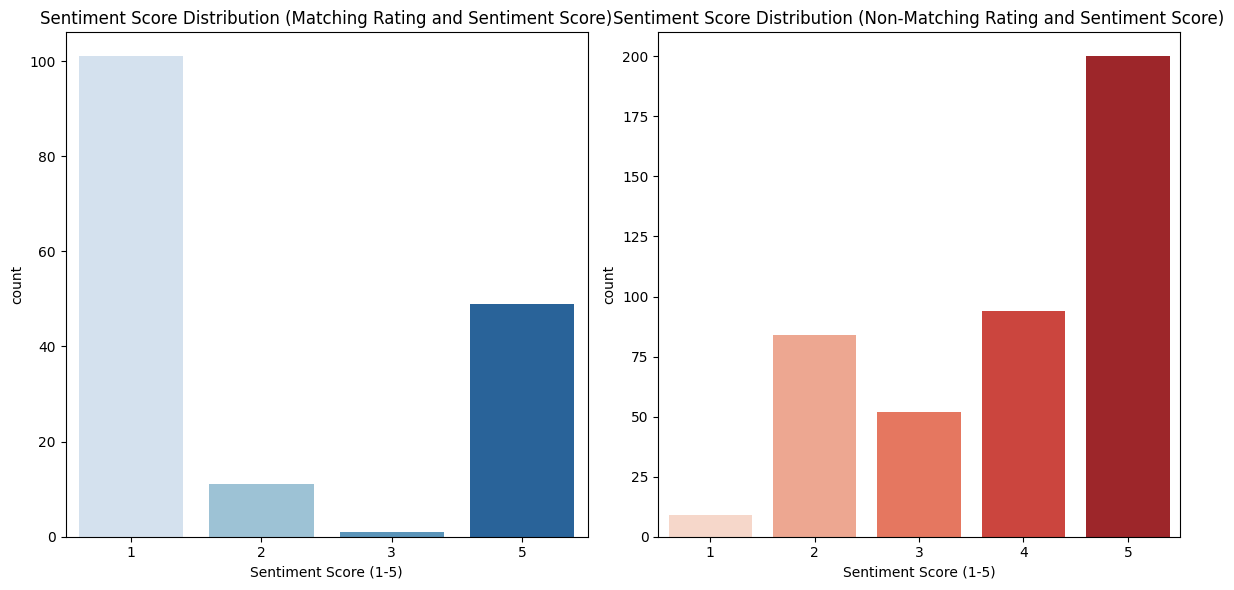


Average Sentiment Score Difference by Rating:
Rating
1.0   -2.256466
2.0   -1.435484
3.0   -1.400000
4.0   -1.000000
5.0    0.232143
Name: Sentiment Difference, dtype: float64


/var/folders/j1/17055ftj3cn3s65tq24363mc0000gn/T/ipykernel_21813/3963632168.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Rating', y='Sentiment Difference', data=df, palette='Set2')


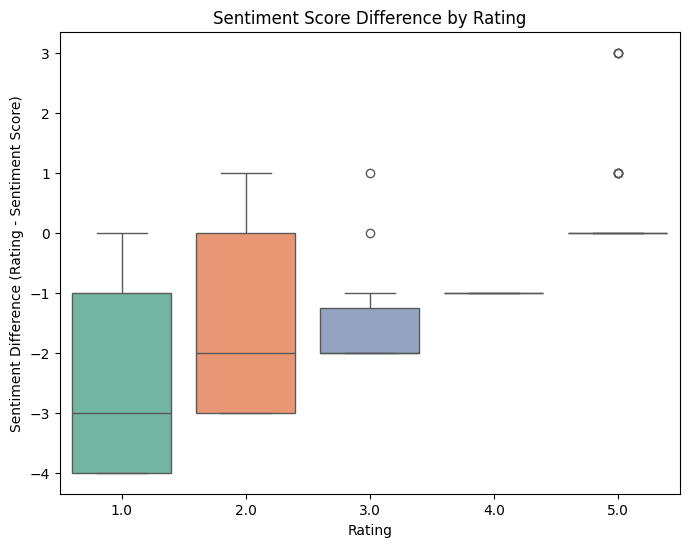

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 감성 분석 결과와 Rating의 차이를 계산
df['Sentiment Difference'] = df['Rating'] - df['Sentiment Score (1-5)']

# 감성 분석과 Rating이 어떻게 일치하는지 분석
matching = df[df['Sentiment Difference'] == 0]
non_matching = df[df['Sentiment Difference'] != 0]

# 일치한 데이터와 일치하지 않은 데이터 개수 출력
print(f"Number of matching reviews (Rating and Sentiment Score are the same): {matching.shape[0]}")
print(f"Number of non-matching reviews (Rating and Sentiment Score are different): {non_matching.shape[0]}")

# 일치하는 경우와 일치하지 않는 경우의 'Sentiment Score' 분포 시각화
plt.figure(figsize=(12, 6))

# 일치한 경우 (Sentiment Score와 Rating이 일치)
plt.subplot(1, 2, 1)
sns.countplot(x='Sentiment Score (1-5)', data=matching, palette='Blues')
plt.title('Sentiment Score Distribution (Matching Rating and Sentiment Score)')

# 일치하지 않은 경우 (Sentiment Score와 Rating이 일치하지 않음)
plt.subplot(1, 2, 2)
sns.countplot(x='Sentiment Score (1-5)', data=non_matching, palette='Reds')
plt.title('Sentiment Score Distribution (Non-Matching Rating and Sentiment Score)')

plt.tight_layout()
plt.show()

# Rating별 Sentiment Score 차이 평균 분석
rating_sentiment_diff = df.groupby('Rating')['Sentiment Difference'].mean()
print("\nAverage Sentiment Score Difference by Rating:")
print(rating_sentiment_diff)

# 감성 분석 점수와 실제 Rating의 차이가 어떻게 분포하는지 시각화
plt.figure(figsize=(8, 6))
sns.boxplot(x='Rating', y='Sentiment Difference', data=df, palette='Set2')
plt.title('Sentiment Score Difference by Rating')
plt.xlabel('Rating')
plt.ylabel('Sentiment Difference (Rating - Sentiment Score)')
plt.show()


Reviews with Ratings 1, 2, and 3 express more negative sentiment in the sentiment analysis than they actually do.
Reviews with Ratings 4 and 5 are more aligned with the sentiment analysis, and in particular, Rating 5 closely matches the actual score.

1. Sentiment analysis appears to capture extreme emotions (very positive/very negative) more accurately.
2. In cases of discrepancy, sentiment analysis tends to evaluate reviews more positively than the actual rating.
3. Discrepancies between Rating and Sentiment Score occur more frequently for mid-range scores (2-4).

In [45]:
from collections import Counter

# 2. Rating별 자주 등장하는 키워드
rating_keywords = {}
for rating in df['Rating'].unique():
    rating_reviews = ' '.join(df[df['Rating'] == rating]['Review'])
    rating_word_counts = Counter(rating_reviews.split())
    rating_keywords[rating] = rating_word_counts.most_common(10)

print("Most common keywords by Rating:")
for rating, keywords in rating_keywords.items():
    print(f"Rating {rating}: {keywords}")


Most common keywords by Rating:
Rating 4.0: [('glasses', 13), ('get', 8), ('good', 7), ('visionworks', 5), ('one', 4), ('frames', 4), ('lenses', 4), ('quality', 4), ('could', 4), ('great', 3)]
Rating 5.0: [('glasses', 53), ('visionworks', 41), ('great', 38), ('went', 24), ('service', 21), ('customer', 17), ('eye', 17), ('would', 16), ('experience', 16), ('professional', 16)]
Rating 1.0: [('glasses', 729), ('told', 328), ('visionworks', 300), ('pair', 298), ('went', 272), ('would', 269), ('get', 267), ('one', 260), ('lenses', 218), ('back', 218)]
Rating 2.0: [('glasses', 98), ('visionworks', 46), ('lenses', 40), ('went', 36), ('pair', 31), ('frames', 30), ('back', 29), ('told', 29), ('eye', 27), ('would', 27)]
Rating 3.0: [('glasses', 13), ('visionworks', 6), ('frames', 6), ('lenses', 5), ('would', 5), ('good', 5), ('insurance', 4), ('many', 4), ('back', 4), ('vision', 4)]


In [46]:
# 3. Sentiment Score별 자주 등장하는 키워드
sentiment_keywords = {}
for sentiment in df['Sentiment Score (1-5)'].unique():
    sentiment_reviews = ' '.join(df[df['Sentiment Score (1-5)'] == sentiment]['Review'])
    sentiment_word_counts = Counter(sentiment_reviews.split())
    sentiment_keywords[sentiment] = sentiment_word_counts.most_common(10)

print("Most common keywords by Sentiment Score:")
for sentiment, keywords in sentiment_keywords.items():
    print(f"Sentiment Score {sentiment}: {keywords}")


Most common keywords by Sentiment Score:
Sentiment Score 5: [('glasses', 378), ('visionworks', 175), ('pair', 152), ('get', 143), ('went', 140), ('would', 131), ('lenses', 130), ('one', 129), ('frames', 123), ('told', 116)]
Sentiment Score 4: [('glasses', 148), ('visionworks', 71), ('went', 65), ('told', 63), ('would', 54), ('pair', 52), ('one', 50), ('get', 45), ('store', 42), ('back', 39)]
Sentiment Score 1: [('glasses', 167), ('told', 92), ('visionworks', 63), ('would', 62), ('pair', 60), ('store', 58), ('back', 58), ('get', 55), ('never', 53), ('could', 50)]
Sentiment Score 3: [('glasses', 76), ('told', 34), ('visionworks', 29), ('would', 26), ('one', 24), ('lenses', 24), ('pair', 23), ('get', 22), ('went', 21), ('never', 20)]
Sentiment Score 2: [('glasses', 137), ('visionworks', 60), ('told', 59), ('went', 58), ('pair', 53), ('one', 52), ('get', 47), ('said', 47), ('store', 45), ('would', 44)]


In [47]:
from collections import Counter
from nltk import ngrams

def get_ngrams(text, n):
    # 텍스트를 단어로 분리
    words = text.split()
    # n-gram 생성
    n_grams = list(ngrams(words, n))
    # n-gram을 문자열로 변환
    return [' '.join(gram) for gram in n_grams]

# Rating별 분석
for rating in df['Rating'].unique():
    rating_reviews = ' '.join(df[df['Rating'] == rating]['Review'])
    
    # Unigrams (단일 단어)
    unigrams = Counter(rating_reviews.split()).most_common(5)
    # Bigrams (2단어 조합)
    bigrams = Counter(get_ngrams(rating_reviews, 2)).most_common(5)
    # Trigrams (3단어 조합)
    trigrams = Counter(get_ngrams(rating_reviews, 3)).most_common(5)
    
    print(f"\nRating {rating}:")
    print(f"Top 5 Unigrams: {unigrams}")
    print(f"Top 5 Bigrams: {bigrams}")
    print(f"Top 5 Trigrams: {trigrams}")

# Sentiment Score별 분석
for sentiment in df['Sentiment Score (1-5)'].unique():
    sentiment_reviews = ' '.join(df[df['Sentiment Score (1-5)'] == sentiment]['Review'])
    
    # Unigrams
    unigrams = Counter(sentiment_reviews.split()).most_common(5)
    # Bigrams
    bigrams = Counter(get_ngrams(sentiment_reviews, 2)).most_common(5)
    # Trigrams
    trigrams = Counter(get_ngrams(sentiment_reviews, 3)).most_common(5)
    
    print(f"\nSentiment Score {sentiment}:")
    print(f"Top 5 Unigrams: {unigrams}")
    print(f"Top 5 Bigrams: {bigrams}")
    print(f"Top 5 Trigrams: {trigrams}")



Rating 4.0:
Top 5 Unigrams: [('glasses', 13), ('get', 8), ('good', 7), ('visionworks', 5), ('one', 4)]
Top 5 Bigrams: [('glasses good', 2), ('good quality', 2), ('glasses store', 2), ('glasses made', 1), ('made visionworks', 1)]
Top 5 Trigrams: [('glasses made visionworks', 1), ('made visionworks promenade', 1), ('visionworks promenade miami', 1), ('promenade miami mr', 1), ('miami mr paul', 1)]

Rating 5.0:
Top 5 Unigrams: [('glasses', 53), ('visionworks', 41), ('great', 38), ('went', 24), ('service', 21)]
Top 5 Bigrams: [('customer service', 10), ('went visionworks', 8), ('vision works', 7), ('eye exam', 4), ('great customer', 4)]
Top 5 Trigrams: [('great customer service', 3), ('made feel comfortable', 3), ('make sure satisfied', 3), ('went vision works', 3), ('highly recommend visionworks', 2)]

Rating 1.0:
Top 5 Unigrams: [('glasses', 729), ('told', 328), ('visionworks', 300), ('pair', 298), ('went', 272)]
Top 5 Bigrams: [('eye exam', 74), ('pair glasses', 72), ('customer service

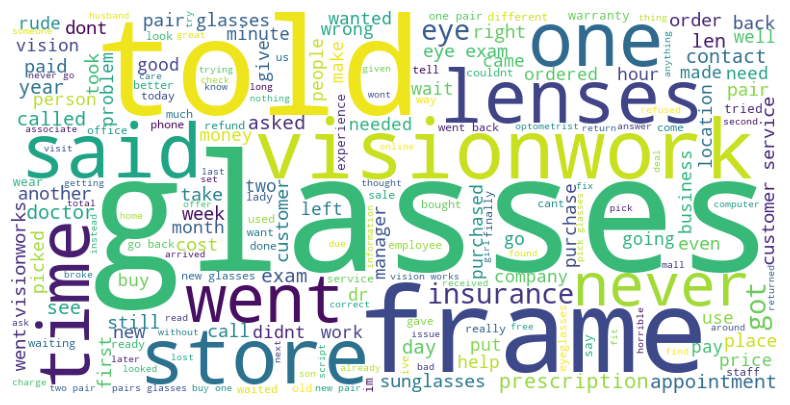

In [48]:
# Reviews under 2
negative_reviews = df[df['Rating'] <= 2]

# Wordcloud Visualization
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(negative_reviews['Review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


In [49]:
# 감성 점수와 평점 차이가 큰 리뷰 추출
large_diff = df[abs(df['Rating'] - df['Sentiment Score (1-5)']) >= 2]
print("Sample reviews with huge gaps:")
print(large_diff[['Review', 'Rating', 'Sentiment Score (1-5)']].head())


Sample reviews with huge gaps:
                                               Review  Rating  \
5   yet get glasses 3 weeks one called call times ...     1.0   
7   waited 2 weeks glasses prescription could gott...     1.0   
8   first appt 102024 contacts never submitted ord...     1.0   
10  purchased several pairs glasses visionworks re...     1.0   
11  store 2100 arden way sacramento ca managed car...     1.0   

    Sentiment Score (1-5)  
5                       4  
7                       5  
8                       3  
10                      5  
11                      5  


In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# TF-IDF 벡터화
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
tfidf = vectorizer.fit_transform(df['Review'])

# NMF로 토픽 추출
nmf = NMF(n_components=5)
topic_matrix = nmf.fit_transform(tfidf)

# 각 토픽의 주요 키워드 출력
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(nmf.components_):
    top_words = [feature_names[i] for i in topic.argsort()[:-10:-1]]
    print(f"Topic {topic_idx + 1}: {', '.join(top_words)}")


Topic 1: glasses, pair, told, went, store, sunglasses, got, ordered, said
Topic 2: appointment, exam, eye, contacts, doctor, contact, dr, prescription, told
Topic 3: service, customer, great, good, visionworks, experience, glasses, place, time
Topic 4: lenses, frames, lens, new, purchased, coating, warranty, wanted, months
Topic 5: insurance, company, visionworks, use, cost, pay, glasses, went, better


The topic modeling analysis reveals the following key areas of customer experience:

1. Product/Purchase Process (Topic 1)
- Frequent discussions about the eyewear purchasing process
- Keywords related to products such as “glasses,” “pair,” and “sunglasses”
- Words associated with the purchase process like “told,” “went,” and “ordered”

2. Medical Services (Topic 2)
- Experiences related to eye exams and medical services
- Professional medical terms such as “appointment,” “exam,” and “doctor”
- Issues related to prescriptions and contact lenses

3. Customer Service Experience (Topic 3)
- Evaluations of overall service quality
- Experience-related words like “service,” “experience,” “great,” and “good”
- General impressions of Visionworks

4. Product Technology/Quality (Topic 4)
- Technical aspects of products and warranty coverage
- Technical terms such as “lenses,” “frames,” and “coating”
- Important discussions on warranty issues

5.Cost/Insurance Processing (Topic 5)
- Financial aspects and insurance handling
- Finance-related terms like “insurance,” “cost,” and “pay”
-Evaluations of value for money

In [51]:
from nltk import ngrams
from collections import Counter

def analyze_ngrams(text, n):
    words = text.split()
    n_grams = ngrams(words, n)
    return Counter(n_grams).most_common(10)

# Bi-gram analysis of negative reviews
negative_text = ' '.join(negative_reviews['Review'])
print("Most frequent 2 words combinations:")
print(analyze_ngrams(negative_text, 2))
print("Most frequent 3 words combinations:")
print(analyze_ngrams(negative_text, 3))
print("Most frequent 4 words combinations:")
print(analyze_ngrams(negative_text, 4))
print("Most frequent 5 words combinations:합:")
print(analyze_ngrams(negative_text, 5))

Most frequent 2 words combinations:
[(('eye', 'exam'), 87), (('pair', 'glasses'), 84), (('customer', 'service'), 78), (('went', 'visionworks'), 74), (('new', 'glasses'), 46), (('one', 'pair'), 45), (('went', 'back'), 44), (('told', 'would'), 42), (('go', 'back'), 41), (('pairs', 'glasses'), 37)]
Most frequent 3 words combinations:
[(('buy', 'one', 'get'), 26), (('one', 'get', 'one'), 26), (('get', 'one', 'free'), 19), (('never', 'go', 'back'), 18), (('2', 'pairs', 'glasses'), 14), (('two', 'pairs', 'glasses'), 11), (('new', 'pair', 'glasses'), 11), (('went', 'pick', 'glasses'), 9), (('went', 'visionworks', 'get'), 9), (('worst', 'customer', 'service'), 8)]
Most frequent 4 words combinations:
[(('buy', 'one', 'get', 'one'), 26), (('one', 'get', 'one', 'free'), 17), (('never', 'go', 'back', 'visionworks'), 4), (('went', 'visionworks', 'get', 'eye'), 4), (('told', 'glasses', 'would', 'ready'), 3), (('eye', 'exam', 'new', 'glasses'), 3), (('ordered', '2', 'pairs', 'glasses'), 3), (('said',

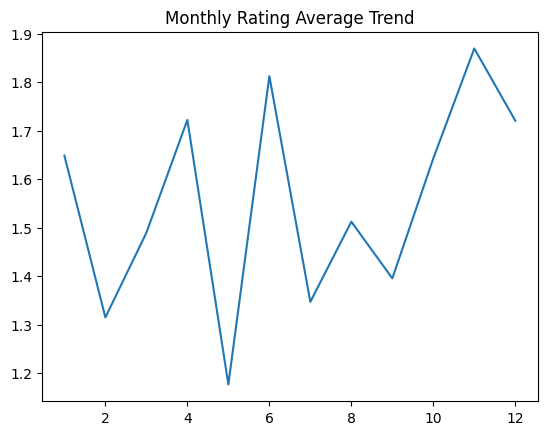

In [52]:
# Monthly rating average trend
df['Date'] = pd.to_datetime(df['Date'])
time_analysis = df.groupby(df['Date'].dt.month)['Rating'].mean()
plt.plot(time_analysis)
plt.title('Monthly Rating Average Trend')
plt.show()